<a href="https://colab.research.google.com/github/Pratik-Tech-Wizard/Algo/blob/main/Swiggy_Instamart_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers = pd.read_csv("Customers.csv")
customers

,CustomerID,Name,Phone,Address,City
0,1,Kavya Reddy,9193214172,"Koramangala, Delhi",Mumbai
1,2,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
2,3,Neha Joshi,6430427670,"Civil Lines, Hyderabad",Jaipur
3,4,Siddharth Mehta,2645852001,"MG Road, Jaipur",Jaipur
4,5,Rajesh Reddy,2428071930,"Koramangala, Pune",Ahmedabad
...,...,...,...,...,...
295,296,Rohit Sharma,6671028571,"Gachibowli, Bangalore",Jaipur
296,297,Siddharth Joshi,6721377969,"Malviya Nagar, Pune",Jaipur
297,298,Aarav Sharma,6633244842,"Andheri West, Ahmedabad",Ahmedabad
298,299,Pooja Gupta,8413555089,"Civil Lines, Delhi",Delhi


In [ ]:
orders = pd.read_csv("Orders.csv")
orders

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered
...,...,...,...,...,...,...
3995,3996,163,2024-11-15 17:59:56,2024-11-15 18:16:56,1130,Delivered
3996,3997,13,2024-11-09 10:02:56,2024-11-09 10:18:56,670,Delivered
3997,3998,97,2024-11-10 22:47:56,2024-11-10 22:58:56,950,Delivered
3998,3999,273,2024-09-30 22:37:56,2024-09-30 22:45:56,778,Delivered


In [ ]:
order_details = pd.read_csv("OrderDetails.csv")
order_details

,OrderDetailsID,OrderID,ProductName,Quantity,PricePerUnit
0,1,2262,Clinic Plus Shampoo,1,99
1,2,115,Maggi Noodles,5,120
2,3,3872,Harpic Toilet Cleaner,4,300
3,4,3489,Ariel Detergent,5,99
4,5,1717,Bournvita,3,99
...,...,...,...,...,...
9995,9996,1240,Good Day Cookies,5,80
9996,9997,946,Parle-G Biscuits,1,130
9997,9998,2576,Maggi Noodles,2,35
9998,9999,2336,Fortune Oil,1,99


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  300 non-null    int64 
 1   Name        300 non-null    object
 2   Phone       300 non-null    int64 
 3   Address     300 non-null    object
 4   City        300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrderID           4000 non-null   int64 
 1   CustomerID        4000 non-null   int64 
 2   OrderDateTime     4000 non-null   object
 3   DeliveryDateTime  3924 non-null   object
 4   TotalAmount       4000 non-null   int64 
 5   DeliveryStatus    4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
#datetime conversion
orders["OrderDateTime"]=pd.to_datetime(orders["OrderDateTime"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderID           4000 non-null   int64         
 1   CustomerID        4000 non-null   int64         
 2   OrderDateTime     4000 non-null   datetime64[ns]
 3   DeliveryDateTime  3924 non-null   object        
 4   TotalAmount       4000 non-null   int64         
 5   DeliveryStatus    4000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 187.6+ KB


In [ ]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderDetailsID  10000 non-null  int64 
 1   OrderID         10000 non-null  int64 
 2   ProductName     10000 non-null  object
 3   Quantity        10000 non-null  int64 
 4   PricePerUnit    10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [ ]:
customers.isnull().sum()

,0
CustomerID,0
Name,0
Phone,0
Address,0
City,0


In [ ]:
order_details.isnull().sum()

,0
OrderDetailsID,0
OrderID,0
ProductName,0
Quantity,0
PricePerUnit,0


In [ ]:
orders.isnull().sum()

,0
OrderID,0
CustomerID,0
OrderDateTime,0
DeliveryDateTime,76
TotalAmount,0
DeliveryStatus,0


In [ ]:
customers.duplicated().sum()

np.int64(0)

In [ ]:
order_details.duplicated().sum()

np.int64(0)

In [ ]:
orders.duplicated().sum()

np.int64(0)

In [ ]:
#if your data contains values use the following code
customers.drop_duplicates()

,CustomerID,Name,Phone,Address,City
0,1,Kavya Reddy,9193214172,"Koramangala, Delhi",Mumbai
1,2,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
2,3,Neha Joshi,6430427670,"Civil Lines, Hyderabad",Jaipur
3,4,Siddharth Mehta,2645852001,"MG Road, Jaipur",Jaipur
4,5,Rajesh Reddy,2428071930,"Koramangala, Pune",Ahmedabad
...,...,...,...,...,...
295,296,Rohit Sharma,6671028571,"Gachibowli, Bangalore",Jaipur
296,297,Siddharth Joshi,6721377969,"Malviya Nagar, Pune",Jaipur
297,298,Aarav Sharma,6633244842,"Andheri West, Ahmedabad",Ahmedabad
298,299,Pooja Gupta,8413555089,"Civil Lines, Delhi",Delhi


In [ ]:
city_count = customers.groupby("City").agg({"CustomerID":"count"})
city_count

,CustomerID
City,
Ahmedabad,46
Bangalore,34
Delhi,37
Hyderabad,48
Jaipur,49
Mumbai,47
Pune,39


In [ ]:
join_orders_customers = pd.merge(left = orders, right = customers, on = "CustomerID", how = "inner"  )
join_orders_customers

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus,Name,Phone,Address,City
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered,Pooja Joshi,7598229457,"Civil Lines, Delhi",Ahmedabad
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered,Rajesh Singh,468292990,"Malviya Nagar, Jaipur",Hyderabad
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered,Ananya Gupta,4195752139,"Civil Lines, Hyderabad",Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
3995,3996,163,2024-11-15 17:59:56,2024-11-15 18:16:56,1130,Delivered,Rajesh Khan,6903961149,"Satellite, Hyderabad",Ahmedabad
3996,3997,13,2024-11-09 10:02:56,2024-11-09 10:18:56,670,Delivered,Aarav Sharma,9412974585,"Koramangala, Jaipur",Hyderabad
3997,3998,97,2024-11-10 22:47:56,2024-11-10 22:58:56,950,Delivered,Pooja Mehta,2978712294,"Satellite, Hyderabad",Jaipur
3998,3999,273,2024-09-30 22:37:56,2024-09-30 22:45:56,778,Delivered,Rajesh Sharma,1080118875,"MG Road, Hyderabad",Jaipur


In [ ]:
revenue_city = join_orders_customers.groupby(["City","DeliveryStatus"]).agg({"OrderID":"count","TotalAmount":"sum"})
revenue_city

OrderID  TotalAmount
City      DeliveryStatus                      
Ahmedabad Cancelled             6         6578
          Delivered           592       475208
Bangalore Cancelled             9         5960
          Delivered           466       373445
Delhi     Cancelled            15        13225
          Delivered           486       383151
Hyderabad Cancelled            11         9541
          Delivered           620       512445
Jaipur    Cancelled            16        11799
          Delivered           642       515888
Mumbai    Cancelled             8         7303
          Delivered           618       504781
Pune      Cancelled            11         8898
          Delivered           500       392266

In [ ]:
status = join_orders_customers.groupby("DeliveryStatus").agg({"TotalAmount":"sum"})
status

,TotalAmount
DeliveryStatus,
Cancelled,63304
Delivered,3157184


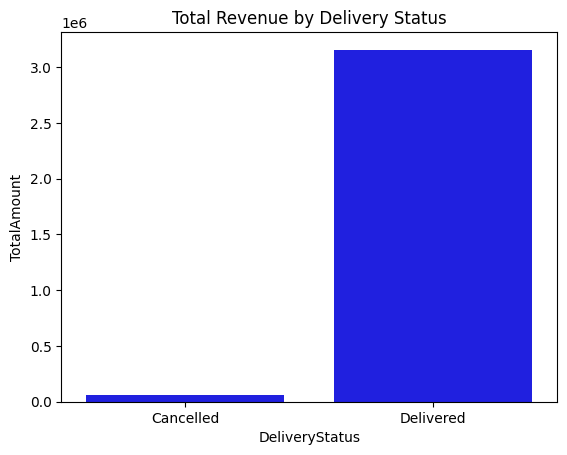

In [ ]:
sns.barplot(data = status, x = status.index, y = "TotalAmount", color="blue")
plt.title("Total Revenue by Delivery Status")
plt.show()

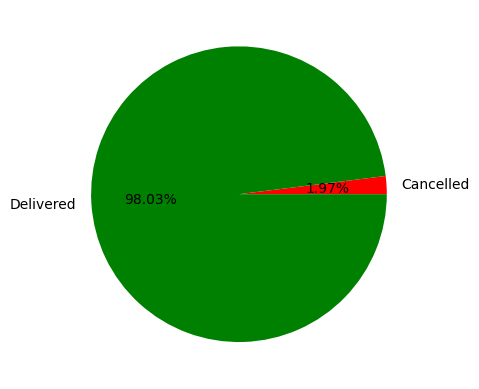

In [ ]:
plt.pie(status["TotalAmount"], labels = status.index, colors=["red","green"], autopct= "%1.2f%%")
plt.show()